In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [53]:
RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

Data = pd.read_csv(f"{RUTA}/data/Data.csv", encoding='latin1', sep=',', on_bad_lines='skip')
Data.shape

C:\Users\Userr\AppData\Local\Temp\ipykernel_10128\2356530730.py:3: DtypeWarning: Columns (5,12) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(f"{RUTA}/data/Data.csv", encoding='latin1', sep=',', on_bad_lines='skip')


(585927, 13)

In [54]:
Data.head(5)

,fecha_transaccion,periodo,id_transaccion,id_sucursal,linea_dispensacion,id_paciente,id_pactprdo,skuagr_2,cantidad_dispensada,costcomp_unit,valorventa_unit_sl,first_spend,id_factura
0,2024-02-01,202402,281819_281819_1010,1010,CAPITA,1002023082,1002023082_202402,61073475G5,60.0,32.384,40.000000,CONCURRENT ...,0
1,2024-04-26,202404,633315_633315_1017,1017,CAPITA,72158665,72158665_202404,16136775G5,30.0,39.468,55.384615,CONCURRENT ...,0
2,2024-02-28,202402,286272_286272_1010,1010,CAPITA,23183093,23183093_202402,35724945G5,2.0,4169.440,5340.000000,CONCURRENT ...,0
3,2024-01-05,202401,251437_251437_1012,1012,CAPITA,1043586626,1043586626_202401,13854875G5,6.0,217.580,335.384615,FIRST SPEND ...,0
4,2024-01-17,202401,253375_253375_1012,1012,CAPITA,72073242,72073242_202401,13854875G5,4.0,217.580,335.384615,CONCURRENT ...,0


In [55]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585927 entries, 0 to 585926
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fecha_transaccion    585927 non-null  object 
 1   periodo              585927 non-null  int64  
 2   id_transaccion       585927 non-null  object 
 3   id_sucursal          585927 non-null  int64  
 4   linea_dispensacion   585927 non-null  object 
 5   id_paciente          585927 non-null  object 
 6   id_pactprdo          585927 non-null  object 
 7   skuagr_2             585120 non-null  object 
 8   cantidad_dispensada  585127 non-null  float64
 9   costcomp_unit        585127 non-null  float64
 10  valorventa_unit_sl   585127 non-null  float64
 11  first_spend          585927 non-null  object 
 12  id_factura           585926 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 58.1+ MB


In [56]:
#Evaluar columans erroneous
missing_values = Data.isnull().sum()
print("Valores nulos por columna:")
print(missing_values)

Valores nulos por columna:
fecha_transaccion        0
periodo                  0
id_transaccion           0
id_sucursal              0
linea_dispensacion       0
id_paciente              0
id_pactprdo              0
skuagr_2               807
cantidad_dispensada    800
costcomp_unit          800
valorventa_unit_sl     800
first_spend              0
id_factura               1
dtype: int64


In [57]:
#Borrar columas que tengan valores erroneos

Data = Data.dropna()

In [58]:
#Evaluar datos vacios
datos_vacios = Data.isna().sum().sort_values()
print("Valñores vacions por columna")
print(datos_vacios)

Valñores vacions por columna
fecha_transaccion      0
periodo                0
id_transaccion         0
id_sucursal            0
linea_dispensacion     0
id_paciente            0
id_pactprdo            0
skuagr_2               0
cantidad_dispensada    0
costcomp_unit          0
valorventa_unit_sl     0
first_spend            0
id_factura             0
dtype: int64


In [59]:
# Convertir la columna de fecha a tipo datetime
Data['fecha_transaccion'] = pd.to_datetime(Data['fecha_transaccion'])

# Crear nuevas columnas para Año, Mes y Día
Data['Año'] = Data['fecha_transaccion'].dt.year
Data['Mes'] = Data['fecha_transaccion'].dt.month
Data['Día'] = Data['fecha_transaccion'].dt.day

In [60]:
# Eliminar columnas innecesarias
# ==============================================================================
Data = Data.drop(columns=['periodo'])
Data = Data.drop(columns=['id_pactprdo'])
Data = Data.drop(columns=['id_factura'])
Data = Data.drop(columns=['fecha_transaccion'])
Data = Data.drop(columns=['Año'])
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585120 entries, 0 to 585926
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_transaccion       585120 non-null  object 
 1   id_sucursal          585120 non-null  int64  
 2   linea_dispensacion   585120 non-null  object 
 3   id_paciente          585120 non-null  object 
 4   skuagr_2             585120 non-null  object 
 5   cantidad_dispensada  585120 non-null  float64
 6   costcomp_unit        585120 non-null  float64
 7   valorventa_unit_sl   585120 non-null  float64
 8   first_spend          585120 non-null  object 
 9   id_factura           585120 non-null  object 
 10  Mes                  585120 non-null  int32  
 11  Día                  585120 non-null  int32  
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 53.6+ MB


In [61]:
# Calcular el día de la semana
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
Data['Día de la Semana'] = pd.to_datetime({'year': 2024, 'month': Data['Mes'], 'day': Data['Día']}).dt.strftime('%A')


In [70]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585120 entries, 0 to 585926
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_transaccion       585120 non-null  object 
 1   id_sucursal          585120 non-null  int64  
 2   linea_dispensacion   585120 non-null  object 
 3   id_paciente          585120 non-null  object 
 4   skuagr_2             585120 non-null  object 
 5   cantidad_dispensada  585120 non-null  int32  
 6   costcomp_unit        585120 non-null  float64
 7   valorventa_unit_sl   585120 non-null  float64
 8   first_spend          585120 non-null  object 
 9   Mes                  585120 non-null  int32  
 10  Día                  585120 non-null  int32  
 11  Día de la Semana     585120 non-null  object 
dtypes: float64(2), int32(3), int64(1), object(6)
memory usage: 51.3+ MB


In [69]:
Data.head(5)

,id_transaccion,id_sucursal,linea_dispensacion,id_paciente,skuagr_2,cantidad_dispensada,costcomp_unit,valorventa_unit_sl,first_spend,Mes,Día,Día de la Semana
0,281819_281819_1010,1010,CAPITA,1002023082,61073475G5,60,32.38,40.00,CONCURRENT ...,2,1,jueves
1,633315_633315_1017,1017,CAPITA,72158665,16136775G5,30,39.47,55.38,CONCURRENT ...,4,26,viernes
2,286272_286272_1010,1010,CAPITA,23183093,35724945G5,2,4169.44,5340.00,CONCURRENT ...,2,28,miÃ©rcoles
3,251437_251437_1012,1012,CAPITA,1043586626,13854875G5,6,217.58,335.38,FIRST SPEND ...,1,5,viernes
4,253375_253375_1012,1012,CAPITA,72073242,13854875G5,4,217.58,335.38,CONCURRENT ...,1,17,miÃ©rcoles


In [66]:
# Convertir la columna de float a int
Data['cantidad_dispensada'] = Data['cantidad_dispensada'].astype(int)

In [68]:
# Redondear la columna a 2 decimales
Data['costcomp_unit'] = Data['costcomp_unit'].round(2)
Data['valorventa_unit_sl'] = Data['valorventa_unit_sl'].round(2)

In [71]:
Data.to_csv('Data2.csv', index=False)

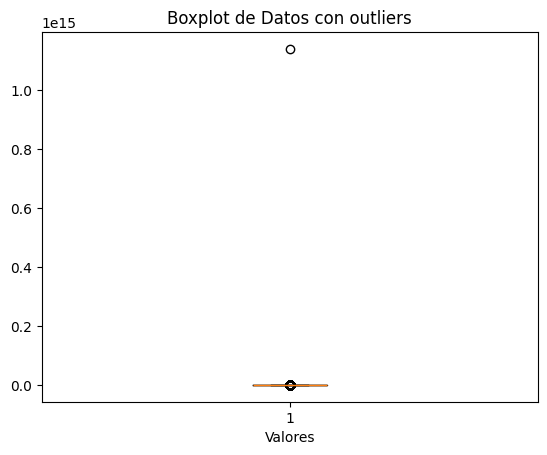

In [74]:
plt.boxplot(Data['valorventa_unit_sl'], vert=True)
plt.title("Boxplot de Datos con outliers")
plt.xlabel("Valores")
plt.show()